Text(0.5, 1.0, 'after')

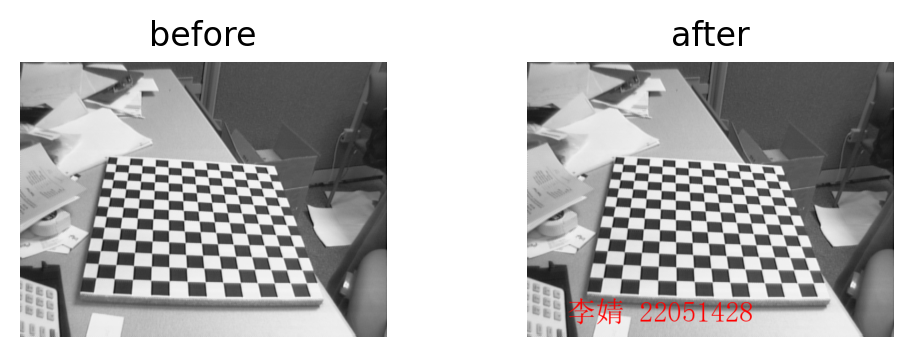

In [38]:
#图片添加文字

import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
img1=cv2.imread("Image1.tif")
fontpath = 'simsun.ttc'
font = ImageFont.truetype(fontpath,50)

# 把array格式转换成PIL的image格式
img2 = Image.fromarray(img1)
# 创建可用来对其进行draw的对象
draw = ImageDraw.Draw(img2)
# 在图像上添加文字
draw.text((70, 410), '李婧 22051428', font=font, fill=(255,0,0))
# 把PIL的image格式转换回成array格式
img3 = np.array(img2)
cv2.imwrite("Image2.jpg",img3)

plt.figure(dpi=200)
plt.subplot(2,2,1)
plt.imshow(img1)
plt.axis('off')
plt.title('before')
#plt.show()

plt.subplot(2,2,2)
plt.imshow(img3)
plt.axis('off')
plt.title('after')
#plt.show()

ret: 1.2168721473932742
mtx: [[656.86460424   0.         301.61575908]
 [  0.         661.73878746 230.6640928 ]
 [  0.           0.           1.        ]]
dist: [[-3.37429275e-01  7.66913982e-01  1.47968757e-03  2.12730059e-04
  -1.38242417e+00]]
rvecs: [array([[0.28112282],
       [0.48344119],
       [0.30315035]]), array([[0.49846489],
       [0.01754041],
       [0.13679762]]), array([[0.59390995],
       [0.22657808],
       [0.18081544]]), array([[ 0.54931466],
       [-0.93758241],
       [-0.14925677]]), array([[0.3162188 ],
       [0.68118286],
       [0.34240767]])]
tvecs: [array([[-0.93976642],
       [-9.48649584],
       [28.73859902]]), array([[-4.9821174 ],
       [-7.36926445],
       [23.43606695]]), array([[-4.47522923],
       [-4.31306137],
       [16.31782319]]), array([[-4.81591277],
       [-2.67854677],
       [13.27637612]]), array([[-2.26789827e-02],
       [-7.07046415e+00],
       [ 2.43719851e+01]])]
total error:  0.07743160834492532


Text(0.5, 1.0, 'after')

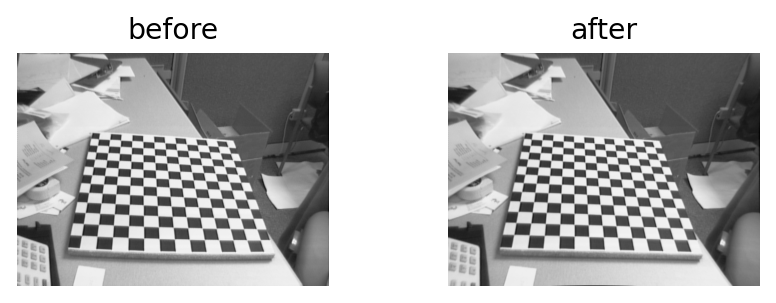

In [46]:
#照片标定
#coding:utf-8

import cv2
import numpy as np
import glob

# 找棋盘格角点
# 阈值
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
#棋盘格模板角点数规格
w = 13
h = 12
# 世界坐标系中的棋盘格点,去掉Z坐标，记为二维矩阵
objp = np.zeros((w*h,3), np.float32)
objp[:,:2] = np.mgrid[0:w,0:h].T.reshape(-1,2)
# 储存棋盘格角点的世界坐标和图像坐标对
objpoints = [] # 在世界坐标系中的三维点
imgpoints = [] # 在图像平面的二维点

images = glob.glob('calib_example/*.tif')
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # 找到棋盘格角点
    ret, corners = cv2.findChessboardCorners(gray, (w,h),None)
    # 如果找到足够点对，将其存储起来
    if ret == True:
        cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        objpoints.append(objp)
        imgpoints.append(corners)
        # 将角点在图像上显示
        cv2.drawChessboardCorners(img, (w,h), corners, ret)
        cv2.imshow('findCorners',img)
        cv2.waitKey(1)
cv2.destroyAllWindows()

# 标定
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("ret:",ret)
print("mtx:",mtx)
print("dist:",dist)
print("rvecs:",rvecs)
print("tvecs:",tvecs)

# 重投影误差
total_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    total_error += error
print("total error: ", total_error/len(objpoints))

# 去畸变
img2 = cv2.imread('calib_example/Image1.tif')
h,  w = img2.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),0,(w,h)) # 自由比例参数
dst = cv2.undistort(img2, mtx, dist, None, newcameramtx)
# 根据前面ROI区域裁剪图片
#x,y,w,h = roi
#dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

plt.figure(dpi=170)
plt.subplot(2,2,1)
plt.imshow(img2)
plt.axis('off')
plt.title('before')
#plt.show()

plt.subplot(2,2,2)
plt.imshow(dst)
plt.axis('off')
plt.title('after')
#plt.show()